In [1]:
from display import display_scrollable_dataframe
import sqlite3
import pandas as pd
import os
import sys

In [2]:
# Determine the database path dynamically
# We check if we are running from the Project Root or the Notebook Folder

current_dir = os.getcwd()
print(f"Current working directory: {current_dir}")

possible_paths = [
    os.path.join('prisma', 'dev.db'),           # If running from root
    os.path.join('..', 'prisma', 'dev.db'),     # If running from Explore_Data
    os.path.join(current_dir, 'prisma', 'dev.db'), # Absolute from root
    os.path.join(os.path.dirname(current_dir), 'prisma', 'dev.db') # Absolute from folder
]

db_path = None
for path in possible_paths:
    if os.path.exists(path):
        db_path = path
        break

if db_path:
    print(f"Found database at: {os.path.abspath(db_path)}")
else:
    print("Could not find database file in expected locations!")
    # List files to help debug
    print("Files in current directory:", os.listdir())

Current working directory: c:\Users\yoel\constructor\Explore_Data
Found database at: c:\Users\yoel\constructor\prisma\dev.db


In [3]:
if db_path:
    try:
        conn = sqlite3.connect(db_path)
        print("Successfully connected to database")
    except Exception as e:
        print(f"Error connecting to database: {e}")
else:
    print("Cannot connect: No database path found")

Successfully connected to database


In [4]:
if db_path:
    # List all tables in the database
    query_tables = "SELECT name FROM sqlite_master WHERE type='table';"
    try:
        tables = pd.read_sql_query(query_tables, conn)
        print("Tables found:")
        display_scrollable_dataframe(tables)
    except Exception as e:
        print(f"Error reading tables: {e}")

Tables found:


,name
0,Project
1,Report
2,Apartment
3,WorkItem
4,Inspection
5,Snapshot


In [5]:
# Read the 'Project' table
if 'conn' in locals():
    query = "SELECT * FROM Project"
    try:
        df_project = pd.read_sql_query(query, conn)
        print(f"Loaded {len(df_project)} projects")
        display_scrollable_dataframe(df_project)
    except Exception as e:
        print(f"Error reading Project table: {e}")

Loaded 1 projects


,id,name,address,createdAt,updatedAt
0,cmkpa097s000010kkxbekjagl,מוסינזון 5 תל אביב,"מוסינזון 5, תל אביב",1769075719337,1769075719337


In [6]:
# Read the 'Report' table
if 'conn' in locals():
    query = "SELECT * FROM Report"
    try:
        df_reports = pd.read_sql_query(query, conn)
        print(f"Loaded {len(df_reports)} reports")
        display_scrollable_dataframe(df_reports)
    except Exception as e:
        print(f"Error reading Report table: {e}")

Loaded 49 reports


id 
 projectId 
 reportDate 
 fileName 
 filePath 
 inspector 
 rawExtraction 
 processed 
 createdAt 
 updatedAt 
 fileHash 
 
 
 
 
 0 
 cmkpa15bn000i10kkv03n6luk 
 cmkpa097s000010kkxbekjagl 
 1730592000000 
 2024-11-03 - מוסינזון 5 תל אביב.pdf 
 C:\Users\yoel\constructor\data\pdfs\2024-11-03 - מוסינזון 5 תל אביב.pdf 
 אינג' אילן שימונוב 
 {"reportDate":"2024-11-03","inspector":"אינג' אילן שימונוב","projectName":"מוסינזון 5 תל אביב","apartments":[{"apartmentNumber":"3","workItems":[{"category":"חיפוי קרמיקה","location":"חדר רחצה","description":"יש להשלים חיפוי עד גובה תקרה","status":"ליקוי","notes":null,"hasPhoto":true},{"category":"ניקוז מזגנים","location":"רחצה הורים","description":"יש לבצע הגבהה של הניקוז","status":"ליקוי","notes":null,"hasPhoto":true},{"category":"כיבוי אש","location":"סלון","description":"יש לבצע קיצור של הספרינקלר ולהכניס לתוך ההנמכה, יש לבצע בהתאם לאישור יועץ","status":"ליקוי","notes":null,"hasPhoto":true},{"category":"נקודת חשמל","location":"סלון","description":"יש לבצע הזזת פתח ביקורת של ארגז התריס למטה","status":"ליקוי","notes":null,"hasPhoto":true},{"category":"אינסטלציה","location":"מטבח","description":"יש להעתיק את נקודת המים למרחק 65 ס\"מ מהקיר","status":"ליקוי","notes":null,"hasPhoto":true},{"category":"חשמל","location":"מטבח","description":"יש לבצע שינוי קופסאות מ4 מקום ל6 מקום ל3 שקעי שירות","status":"ליקוי","notes":null,"hasPhoto":true},{"category":"תשתיות מטבח","location":"מטבח","description":"מצורפת תוכנית מעודכנת לתשתיות המטבח מתאריך 8.11.22, יש לבצע בדיקה נוספת לתשתיות על פי התוכנית המעודכנת","status":"ליקוי","notes":null,"hasPhoto":true}],"inspectionDates":{}},{"apartmentNumber":"5","workItems":[{"category":"חשמל","location":"חדרי רחצה","description":"חוסר בנקודות חשמל למכונת כביסה, יש להשלים","status":"ליקוי","notes":null,"hasPhoto":true},{"category":"כיבוי אש","location":"חדרי רחצה","description":"חוסר בספרינקלר","status":"ליקוי","notes":null,"hasPhoto":false},{"category":"אלומיניום","location":"יחידת הורים","description":"מהדיירת נמסר כי ביקשה לבצע דלת ולא חלון, יש להעביר אסמכתא ולבצע בדיקה","status":"ליקוי","notes":null,"hasPhoto":false},{"category":"אינסטלציה","location":"חדר רחצה הורים","description":"יש לבצע זיכוי על פס ניקוז","status":"ליקוי","notes":null,"hasPhoto":false},{"category":"חיפוי קרמיקה","location":"חדר רחצה הורים","description":"בוצע חיפוי שוכב ויש לבצע חיפוי בצורה אנכית","status":"ליקוי","notes":null,"hasPhoto":false},{"category":"חשמל","location":"מטבח","description":"יש לבצע העתקה של השקע הכפולה למיקום המסומן במים 90 אמצע מהקיר","status":"ליקוי","notes":null,"hasPhoto":true},{"category":"אלומיניום","location":"יחידת הורים","description":"מהדיירת נמסר כי ביקשה לבצע דלת ולא חלון, יש להעביר אסמכתא ולבצע בדיקה","status":"ליקוי","notes":null,"hasPhoto":true},{"category":"אינסטלציה","location":"חדר רחצה הורים","description":"יש לבצע זיכוי על פס ניקוז","status":"ליקוי","notes":null,"hasPhoto":true},{"category":"חיפוי קרמיקה","location":"חדר רחצה הורים","description":"בוצע חיפוי שוכב ויש לבצע חיפוי בצורה אנכית","status":"ליקוי","notes":null,"hasPhoto":true},{"category":"כיבוי אש","location":"מטבח","description":"יש לבצע ביטול של הספרינקלר במרכז המטבח, יש לוודא מול יועץ","status":"ליקוי","notes":null,"hasPhoto":false},{"category":"שדרוג אמבטיה","location":"חדר רחצה כללי","description":"מצ\"ב ההזמנה על ידי אלוני לשדרוג האמבטיה לקטנה יותר, יש ליישם על פי תוכנית וטופס ההזמנה","status":"ליקוי","notes":null,"hasPhoto":true}],"inspectionDates":{}}],"developmentItems":[{"category":"בטיחות","location":"כללי","description":"באחריות היזם/הקבלן/הממונה בטיחות למלא אחר הוראות פיקוד העורף והרשות המקומית ולפעול ע\"פ ההנחיות בתקופת מלחמת חרבות ברזל","status":"הערה","notes":null,"hasPhoto":false},{"category":"איטום","location":"גג עליון","description":"יש להימנע מפגיעה באיטום הגג העליון (בעיקר בין החודשים ספטמבר - מאי)","status":"המלצה","notes":null,"hasPhoto":false},{"category":"איטום","location":"פתחי דירות","description":"נדרש לאטום את כל פתחי דירות היזם החדשות (חלונות/דלתות/מזגנים) ב

In [7]:
# Read the 'Apartment' table
if 'conn' in locals():
    query = "SELECT * FROM Apartment"
    try:
        df_apartments = pd.read_sql_query(query, conn)
        print(f"Loaded {len(df_apartments)} apartments")
        display_scrollable_dataframe(df_apartments)
    except Exception as e:
        print(f"Error reading Apartment table: {e}")

Loaded 8 apartments


,id,projectId,number,floor,createdAt,updatedAt
0,cmkpa0989000210kkc3grgsr1,cmkpa097s000010kkxbekjagl,1,None,1769075719354,1769075719354
1,cmkpa098l000410kkfz0mnasu,cmkpa097s000010kkxbekjagl,3,None,1769075719365,1769075719365
2,cmkpa098w000610kku2m38bic,cmkpa097s000010kkxbekjagl,5,None,1769075719376,1769075719376
3,cmkpa0995000810kkei11mqlg,cmkpa097s000010kkxbekjagl,6,None,1769075719385,1769075719385
4,cmkpa099g000a10kkf2am83ne,cmkpa097s000010kkxbekjagl,7,None,1769075719396,1769075719396
5,cmkpa099p000c10kks4dpl25z,cmkpa097s000010kkxbekjagl,10,None,1769075719405,1769075719405
6,cmkpa099z000e10kk8yjd6cpo,cmkpa097s000010kkxbekjagl,11,None,1769075719416,1769075719416
7,cmkpa09a8000g10kkctzz3jby,cmkpa097s000010kkxbekjagl,14,None,1769075719424,1769075719424


In [8]:
# Read the 'WorkItem' table
if 'conn' in locals():
    query = "SELECT * FROM WorkItem"
    try:
        df_work_items = pd.read_sql_query(query, conn)
        print(f"Loaded {len(df_work_items)} work items")
        display_scrollable_dataframe(df_work_items)
    except Exception as e:
        print(f"Error reading WorkItem table: {e}")

Loaded 701 work items


,id,reportId,apartmentId,category,location,description,status,notes,hasPhoto,photoNotes,createdAt,updatedAt
0,cmkpa15d1000k10kksxzqpjp8,cmkpa15bn000i10kkv03n6luk,cmkpa098l000410kkfz0mnasu,FLOORING,חדר רחצה,יש להשלים חיפוי עד גובה תקרה,DEFECT,NaN,1,None,1769075760997,1769105172961
1,cmkpa15dd000m10kkgh0x6i5e,cmkpa15bn000i10kkv03n6luk,cmkpa098l000410kkfz0mnasu,PLUMBING,רחצה הורים,יש לבצע הגבהה של הניקוז,DEFECT,NaN,1,None,1769075761009,1769105172968
2,cmkpa15dm000o10kkbcx6hfnv,cmkpa15bn000i10kkv03n6luk,cmkpa098l000410kkfz0mnasu,SPRINKLERS,סלון,"יש לבצע קיצור של הספרינקלר ולהכניס לתוך ההנמכה, יש לבצע בהתאם לאישור יועץ",DEFECT,NaN,1,None,1769075761018,1769105172973
3,cmkpa15dw000q10kkddoqs42j,cmkpa15bn000i10kkv03n6luk,cmkpa098l000410kkfz0mnasu,ELECTRICAL,סלון,יש לבצע הזזת פתח ביקורת של ארגז התריס למטה,DEFECT,NaN,1,None,1769075761028,1769075761028
4,cmkpa15e3000s10kki5q433qw,cmkpa15bn000i10kkv03n6luk,cmkpa098l000410kkfz0mnasu,PLUMBING,מטבח,"יש להעתיק את נקודת המים למרחק 65 ס""מ מהקיר",DEFECT,NaN,1,None,1769075761035,1769075761035
5,cmkpa15eb000u10kkc5twxkfz,cmkpa15bn000i10kkv03n6luk,cmkpa098l000410kkfz0mnasu,ELECTRICAL,מטבח,יש לבצע שינוי קופסאות מ4 מקום ל6 מקום ל3 שקעי שירות,DEFECT,NaN,1,None,1769075761044,1769075761044
6,cmkpa15ei000w10kkk3gnc4vv,cmkpa15bn000i10kkv03n6luk,cmkpa098l000410kkfz0mnasu,KITCHEN,מטבח,"מצורפת תוכנית מעודכנת לתשתיות המטבח מתאריך 8.11.22, יש לבצע בדיקה נוספת לתשתיות על פי התוכנית המעודכנת",DEFECT,NaN,1,None,1769075761050,1769075761050
7,cmkpa15ep000y10kks214tom2,cmkpa15bn000i10kkv03n6luk,cmkpa098w000610kku2m38bic,ELECTRICAL,חדרי רחצה,"חוסר בנקודות חשמל למכונת כביסה, יש להשלים",DEFECT,NaN,1,None,1769075761057,1769075761057
8,cmkpa15ev001010kkhc174eum,cmkpa15bn000i10kkv03n6luk,cmkpa098w000610kku2m38bic,SPRINKLERS,חדרי רחצה,חוסר בספרינקלר,DEFECT,NaN,0,None,1769075761063,1769105172980
9,cmkpa15f1001210kkq4qg1phr,cmkpa15bn000i10kkv03n6luk,cmkpa098w000610kku2m38bic,OTHER,יחידת הורים,"מהדיירת נמסר כי ביקשה לבצע דלת ולא חלון, יש להעביר אסמכתא ולבצע בדיקה",DEFECT,NaN,0,None,1769075761069,1769106544588


In [9]:
# Read the 'Inspection' table
if 'conn' in locals():
    query = "SELECT * FROM Inspection"
    try:
        df_inspections = pd.read_sql_query(query, conn)
        print(f"Loaded {len(df_inspections)} inspections")
        display_scrollable_dataframe(df_inspections)
    except Exception as e:
        print(f"Error reading Inspection table: {e}")

Loaded 352 inspections


,id,reportId,apartmentId,category,inspectionDate,status,createdAt,updatedAt
0,cmkpa56bd003b13u5josm17dm,cmkpa529j000p5sxqmqp5t232,cmkpa098l000410kkfz0mnasu,GENERAL,1734480000000,NaN,1769075948857,1769075948857
1,cmkpa56dd003t13u52wpuasxs,cmkpa529j000p5sxqmqp5t232,cmkpa098w000610kku2m38bic,GENERAL,1734480000000,NaN,1769075948929,1769075948929
2,cmkpa56ey004913u5ao5qo5b0,cmkpa529j000p5sxqmqp5t232,cmkpa0995000810kkei11mqlg,GENERAL,1734480000000,NaN,1769075948987,1769075948987
3,cmkpa56gy004p13u5zzhbl2mw,cmkpa529j000p5sxqmqp5t232,cmkpa099g000a10kkf2am83ne,GENERAL,1734480000000,NaN,1769075949059,1769075949059
4,cmkpa56hu004v13u51dlsvlwe,cmkpa529j000p5sxqmqp5t232,cmkpa099p000c10kks4dpl25z,GENERAL,1734480000000,NaN,1769075949090,1769075949090
5,cmkpa7qr5003t5sxq3mexr8vw,cmkpa7qos003f5sxq1d80i1j8,cmkpa098l000410kkfz0mnasu,GENERAL,1738195200000,NaN,1769076068657,1769076068657
6,cmkpa7qrg003v5sxqpnkzqgxb,cmkpa7qos003f5sxq1d80i1j8,cmkpa098l000410kkfz0mnasu,ELECTRICAL,1738195200000,NaN,1769076068668,1769076068668
7,cmkpa7qrr003x5sxq49jmvc7w,cmkpa7qos003f5sxq1d80i1j8,cmkpa098l000410kkfz0mnasu,PLUMBING,1738195200000,DEFECT,1769076068679,1769076068736
8,cmkpa7qso00435sxqbkjvbbom,cmkpa7qos003f5sxq1d80i1j8,cmkpa098w000610kku2m38bic,PLUMBING,1738195200000,DEFECT,1769076068712,1769076068747
9,cmkpaac4o007t13u5nsoqsfci,cmkpaac3e007n13u5gy4hrehp,cmkpa098l000410kkfz0mnasu,GENERAL,1738188000000,NaN,1769076189673,1769076189680


In [10]:
# Read the 'Snapshot' table
if 'conn' in locals():
    query = "SELECT * FROM Snapshot"
    try:
        df_snapshots = pd.read_sql_query(query, conn)
        print(f"Loaded {len(df_snapshots)} snapshots")
        display_scrollable_dataframe(df_snapshots)
    except Exception as e:
        print(f"Error reading Snapshot table: {e}")

Loaded 2 snapshots


id 
 reason 
 data 
 reportCount 
 createdAt 
 restoredAt 
 
 
 
 
 0 
 cml6p27q10000zfjkak99rykm 
 pre-upload: 2026-01-28 - מוסינזון 5 תל אביב.pdf 
 {"reports":[{"id":"cmkpbpf2b0089srw6isbia46g","projectId":"cmkpa097s000010kkxbekjagl","reportDate":"2026-01-11T00:00:00.000Z","fileName":"2026-01-11 - מוסינזון 5 תל אביב.pdf","filePath":"C:\\Users\\yoel\\constructor\\data\\pdfs\\2026-01-11 - מוסינזון 5 תל אביב.pdf","fileHash":null,"inspector":"יהושע טהון","rawExtraction":"{\"reportDate\":\"2026-01-11\",\"inspector\":\"יהושע טהון\",\"projectName\":\"מוסינזון 5 תל אביב\",\"apartments\":[{\"apartmentNumber\":\"1\",\"workItems\":[{\"category\":\"חשמל\",\"location\":\"בקומה למטה\",\"description\":\"חסר 2 גופי תאורה מתחת למדרגות\",\"status\":\"בוצע יש ליקויים\",\"notes\":\"טופל גוף תאורה אחד לשני אין גובה\",\"hasPhoto\":false},{\"category\":\"מקלחון\",\"location\":\"חדר רחצה כללי\",\"description\":\"בדיקת שיפועים לכיוון הניקוז\",\"status\":\"לא תקין\",\"notes\":\"בביצוע הבדיקה התקבל שיפוע בין 4%-1% כנדרש על פי התקנות\",\"hasPhoto\":false}],\"inspectionDates\":{\"בעלים\":\"1.7.25\",\"חללים\":\"1.7.25\",\"חשמל\":\"1.7.25\",\"אינסטלציה\":\"1.7.25\",\"מיזוג אוויר\":\"לא תקין - 5.10.2025\"}},{\"apartmentNumber\":\"3\",\"workItems\":[{\"category\":\"חשמל\",\"location\":\"כלל הבית\",\"description\":\"בדיקת תוכנית חשמל על פי תוכנית שינויי דיירים\",\"status\":\"בוצע ליקויים\",\"notes\":\"דרוש לביצוע חתומה ע״י הדייר\",\"hasPhoto\":true},{\"category\":\"מקלחון\",\"location\":\"חדר רחצה כללי\",\"description\":\"בדיקת שיפועים לכיוון הניקוז\",\"status\":\"לא תקין\",\"notes\":\"בביצוע הבדיקה התקבל שיפוע בין 4%-1% כנדרש על פי התקנות\",\"hasPhoto\":true}],\"inspectionDates\":{\"בעלים\":\"30.1.25\",\"חללים\":\"30.1.25\",\"חשמל\":\"קיימים אי תאומים - 21.4.25\",\"אינסטלציה\":\"קיימים אי תאומים - 30.1.25\",\"מיזוג אוויר\":\"תקין - 17.9.25\"}},{\"apartmentNumber\":\"5\",\"workItems\":[{\"category\":\"דלת כניסה\",\"location\":\"כלל הבית\",\"description\":\"ביצוע התקנת דלת כניסה הנושאת תו תקן ישראלי\",\"status\":\"בוצע\",\"notes\":\"כנדרש ובהתאמה למפרט הטכני\",\"hasPhoto\":false},{\"category\":\"מישק הפרדה\",\"location\":\"חדרי רחצה\",\"description\":\"חרוץ חומר קשיח ובצע מילוי מישקי הפרדה\",\"status\":\"ליקוי\",\"notes\":\"בוצע עם חומר קשיח (רובה)\",\"hasPhoto\":false},{\"category\":\"ארון\",\"location\":\"שירותי אורחים\",\"description\":\"רוחב ארון\",\"status\":\"ליקוי\",\"notes\":\"מאחר ואין עומק בין הדלת לקיר סוכם כי יוזמן ארון צר יותר\",\"hasPhoto\":false}],\"inspectionDates\":{\"חשמל\":\"קיימים אי תאומים - 30.1.25\",\"אינסטלציה\":\"קיימים אי תאומים - 30.1.25\"}},{\"apartmentNumber\":\"6\",\"workItems\":[{\"category\":\"דלת כניסה\",\"location\":\"כלל הבית\",\"description\":\"ביצוע התקנת דלת כניסה הנושאת תו תקן ישראלי\",\"status\":\"בוצע\",\"notes\":null,\"hasPhoto\":false},{\"category\":\"מישק הפרדה\",\"location\":\"חדרי רחצה\",\"description\":\"מישק הפרדה בין כלים סניטריים לחיפוי קרמיקה\",\"status\":\"ליקוי\",\"notes\":\"בוצע עם חומר קשיח (רובה)\",\"hasPhoto\":false}],\"inspectionDates\":{\"בעלים\":\"11.2.25\",\"חללים\":\"11.2.25\",\"חשמל\":\"11.2.25\",\"אינסטלציה\":\"11.2.25\",\"מיזוג אוויר\":\"תקין - 17.9.25\"}},{\"apartmentNumber\":\"7\",\"workItems\":[{\"category\":\"חשמל\",\"location\":\"כלל הבית\",\"description\":\"בדיקת תוכנית חשמל על פי תוכנית שינויי דיירים\",\"status\":\"בוצע, נמצאו אי תאומים\",\"notes\":\"חסרות נקודות תקשורת LAN במספר מקומות\",\"hasPhoto\":true},{\"category\":\"ריצוף\",\"location\":\"כלל הבית\",\"description\":\"עבודות ריצוף בשטח הדירה\",\"status\":\"בוצע חלקית\",\"notes\":\"ביצוע פוגה של 3 מ\\\"מ\",\"hasPhoto\":true},{\"category\":\"סניטריה\",\"location\":\"חדרי רחצה\",\"description\":\"ביצוע התקנת אסלות\",\"status\":\"בוצע\",\"notes\":null,\"hasPhoto\":true},{\"category\":\"מקלחון\",\"location\":\"חדרי רחצה\",\"description\":\"בדיקת שיפועים לכיוון הניקוז\",\"status\":\"לא תקין\",\"notes\":\"בביצוע הבדיקה התקבל שיפוע בין 4%-1% כנדרש על פי התקנות\",\"hasPhoto\":true}],\"inspectionDates\":{\"בעלים\":\"5.5.25\",\"חללים\":\"26.2.

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = [15, 10]
plt.rcParams['font.family'] = 'DejaVu Sans' # Detailed Hebrew support might require specific font configuration

In [12]:
# 1. Data Extraction
if 'conn' in locals():
    query = """
    SELECT 
        r.reportDate,
        a.number as apartment_number,
        wi.category,
        wi.status
    FROM WorkItem wi
    JOIN Report r ON wi.reportId = r.id
    JOIN Apartment a ON wi.apartmentId = a.id
    WHERE wi.apartmentId IS NOT NULL
    ORDER BY r.reportDate ASC
    """
    
    try:
        df_progress = pd.read_sql_query(query, conn)
        # Convert reportDate from timestamp (ms) to datetime
        df_progress['reportDate'] = pd.to_datetime(df_progress['reportDate'], unit='ms')
        
        print(f"Loaded {len(df_progress)} work items for analysis")
        display_scrollable_dataframe(df_progress)
        
        # Check unique statuses to define 'Completed'
        print("Unique Data Statuses:", df_progress['status'].unique())
    except Exception as e:
        print(f"Error extracting data: {e}")

Loaded 528 work items for analysis


,reportDate,apartment_number,category,status
0,2024-11-03,3,FLOORING,DEFECT
1,2024-11-03,3,PLUMBING,DEFECT
2,2024-11-03,3,SPRINKLERS,DEFECT
3,2024-11-03,3,ELECTRICAL,DEFECT
4,2024-11-03,3,PLUMBING,DEFECT
5,2024-11-03,3,ELECTRICAL,DEFECT
6,2024-11-03,3,KITCHEN,DEFECT
7,2024-11-03,5,ELECTRICAL,DEFECT
8,2024-11-03,5,SPRINKLERS,DEFECT
9,2024-11-03,5,OTHER,DEFECT


Unique Data Statuses: <StringArray>
['DEFECT', 'IN_PROGRESS', 'COMPLETED', 'COMPLETED_OK', 'NOT_OK']
Length: 5, dtype: str


In [13]:
# 2. Data Processing
if 'df_progress' in locals():
    # Define what counts as "Complete" (Positive progress)
    # Adjust this list based on the actual statuses found above
    COMPLETED_STATUSES = ['COMPLETED', 'DONE', 'OK', 'בוצע', 'תקין', 'בוצע - תקין'] 
    
    # Create a binary 'is_completed' column
    # Note: 'status' in DB might be English Enum or Hebrew text. 
    # Let's assume standard ones or add logic to check containment.
    def is_done(status):
        if not isinstance(status, str):
            return 0
        return 1 if status in COMPLETED_STATUSES or 'COMPLETED' in status.upper() or 'DONE' in status.upper() else 0

    df_progress['is_completed'] = df_progress['status'].apply(is_done)
    
    # Group by Apartment, Category, Date
    # We want Cumulative Sum over time.
    
    # First, pivot or group to get counts per day
    df_grouped = df_progress.groupby(['apartment_number', 'category', 'reportDate'])['is_completed'].sum().reset_index()
    
    # Sort properly
    df_grouped.sort_values(['apartment_number', 'category', 'reportDate'], inplace=True)
    
    # Calculate Cumulative Sum per Group
    df_grouped['cumulative_completed'] = df_grouped.groupby(['apartment_number', 'category'])['is_completed'].transform(pd.Series.cumsum)
    
    display_scrollable_dataframe(df_grouped)

,apartment_number,category,reportDate,is_completed,cumulative_completed
0,1,DRYWALL,2025-07-28,1,1
1,1,ELECTRICAL,2025-07-28,0,0
2,1,ELECTRICAL,2025-08-18,0,0
3,1,ELECTRICAL,2025-09-04,0,0
4,1,ELECTRICAL,2025-09-17,0,0
5,1,ELECTRICAL,2025-10-22,0,0
6,1,ELECTRICAL,2025-11-19,0,0
7,1,ELECTRICAL,2025-12-03,0,0
8,1,ELECTRICAL,2025-12-24,0,0
9,1,ELECTRICAL,2026-01-11,0,0


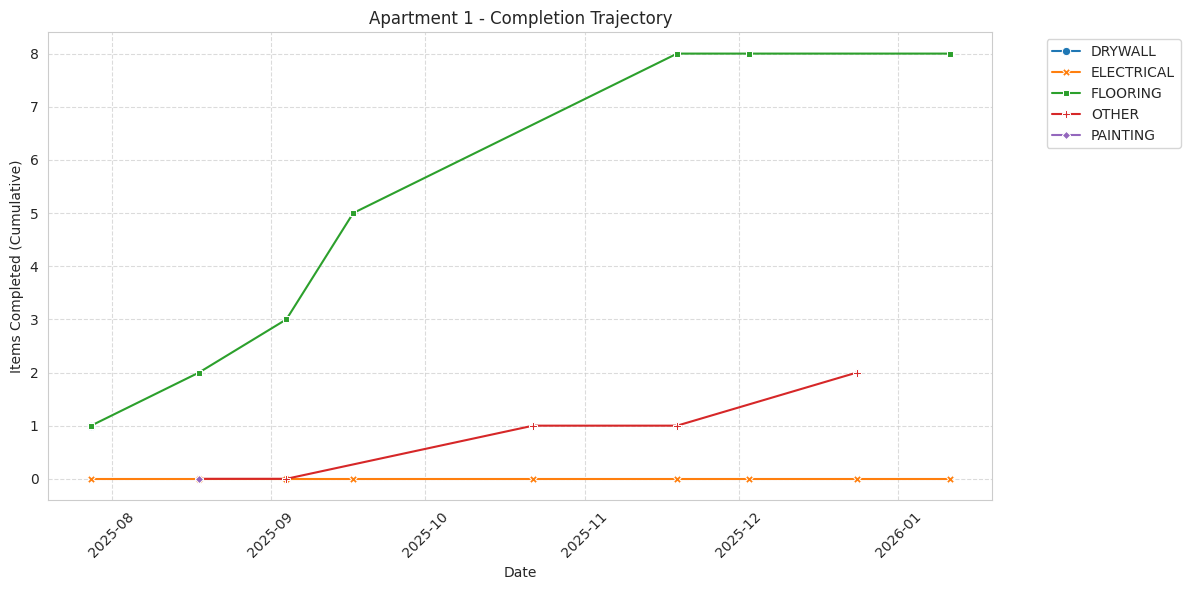

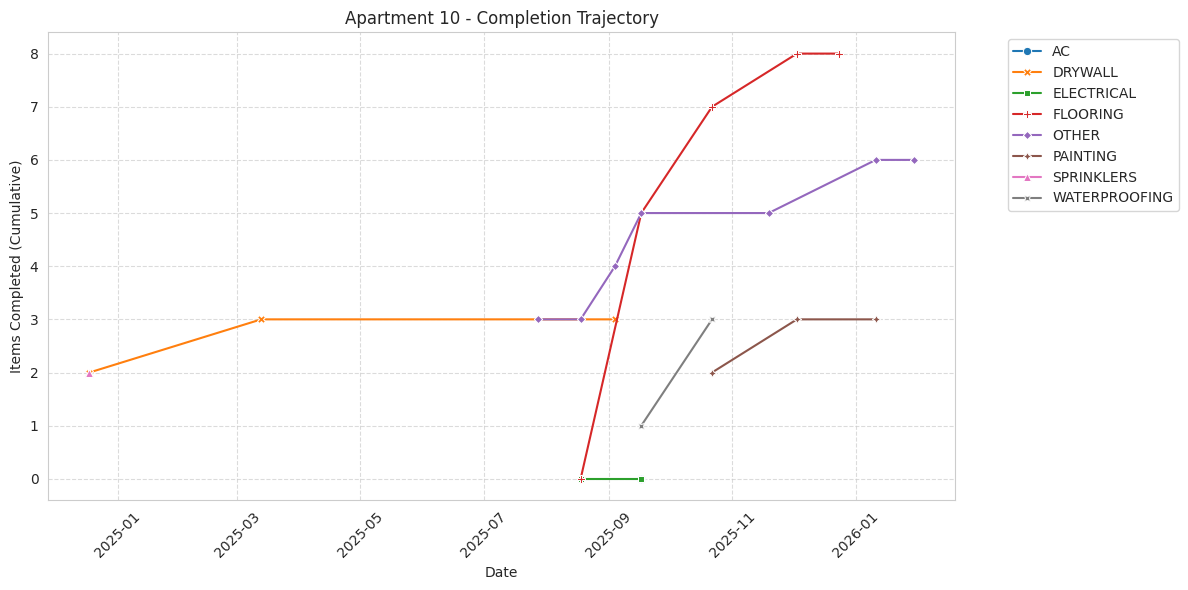

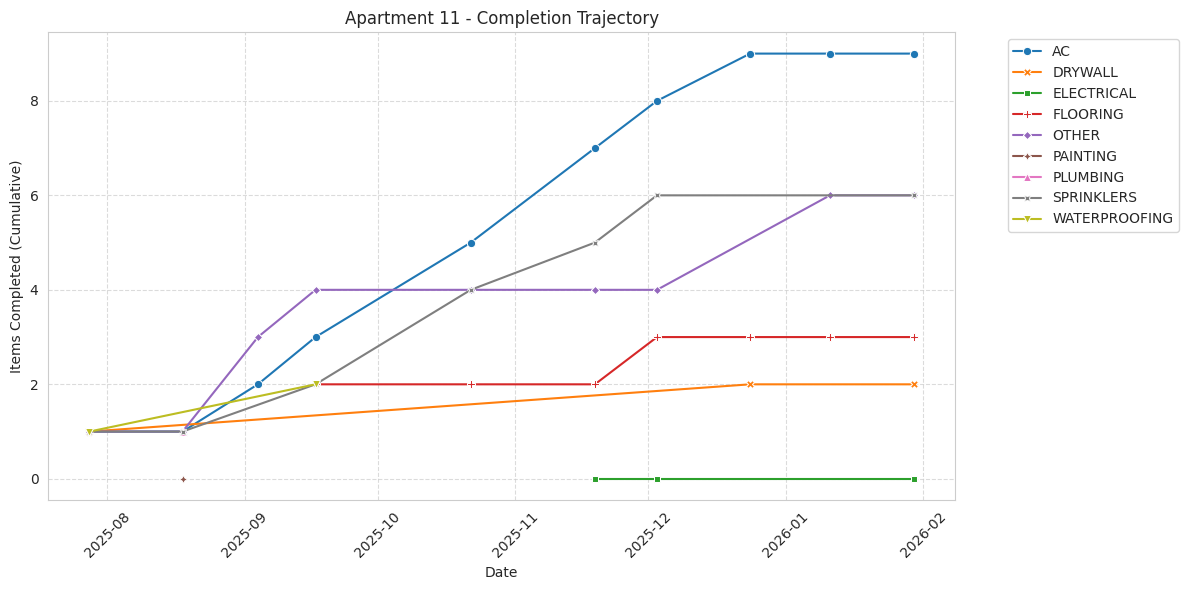

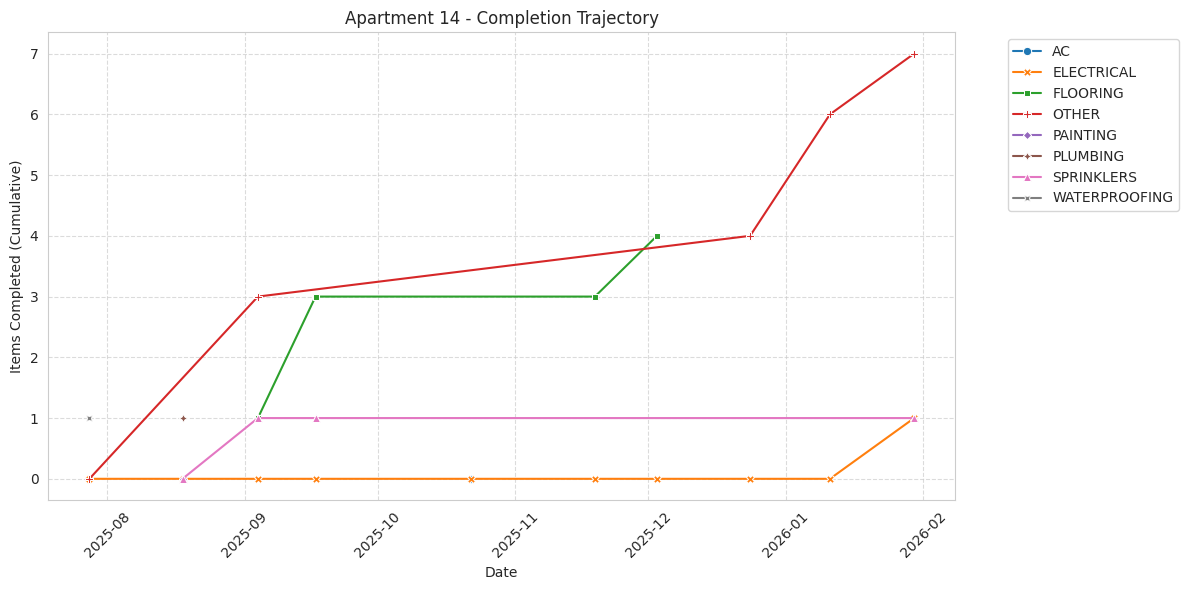

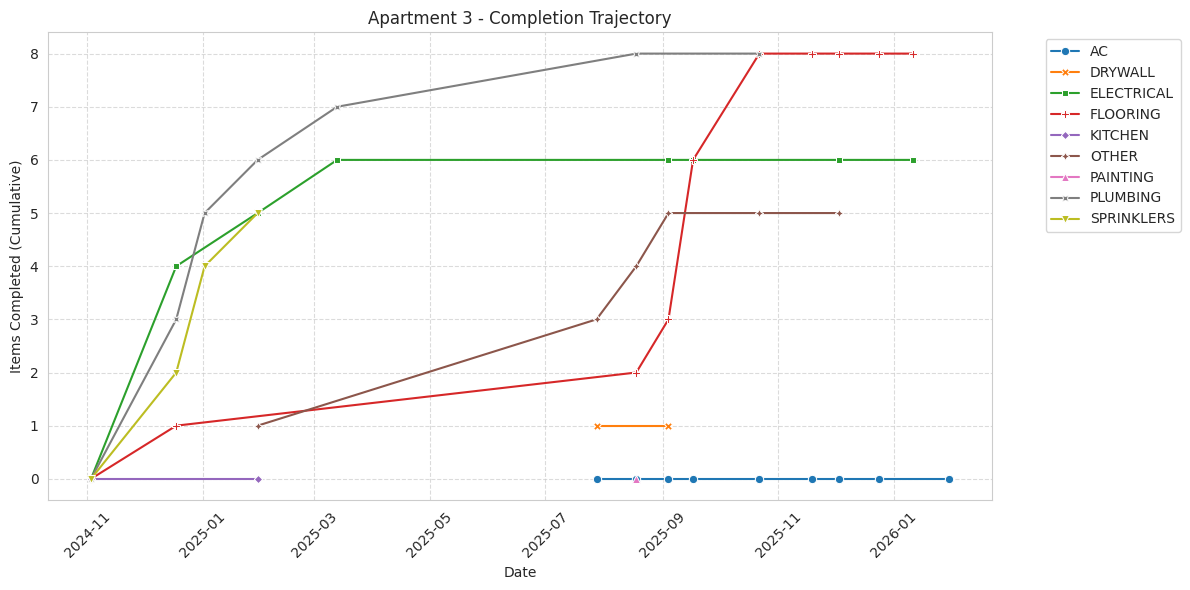

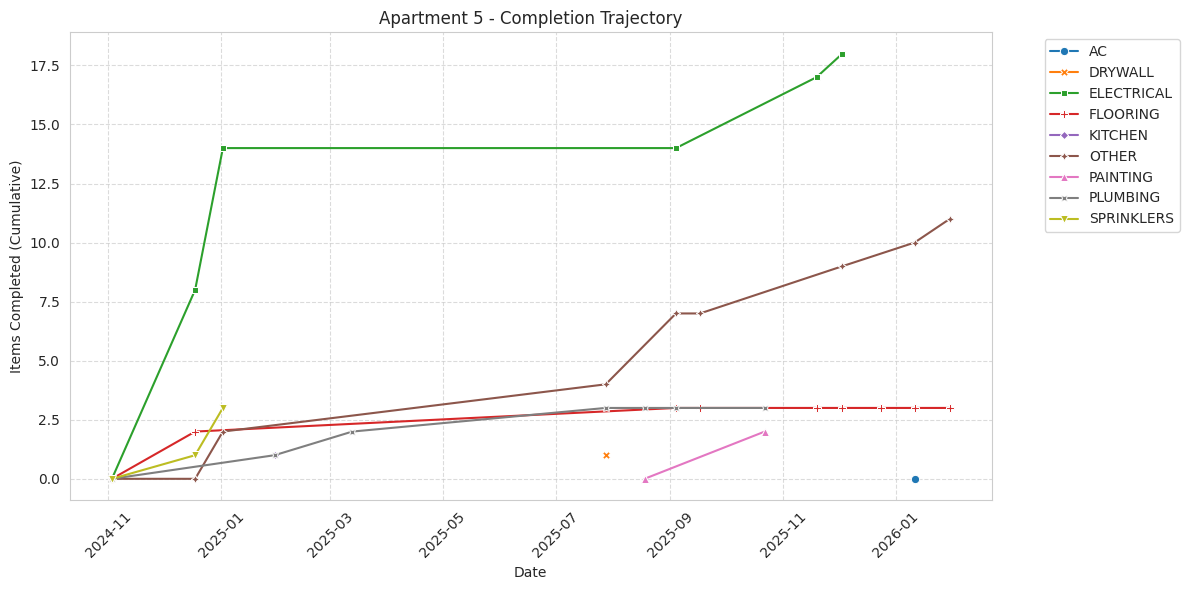

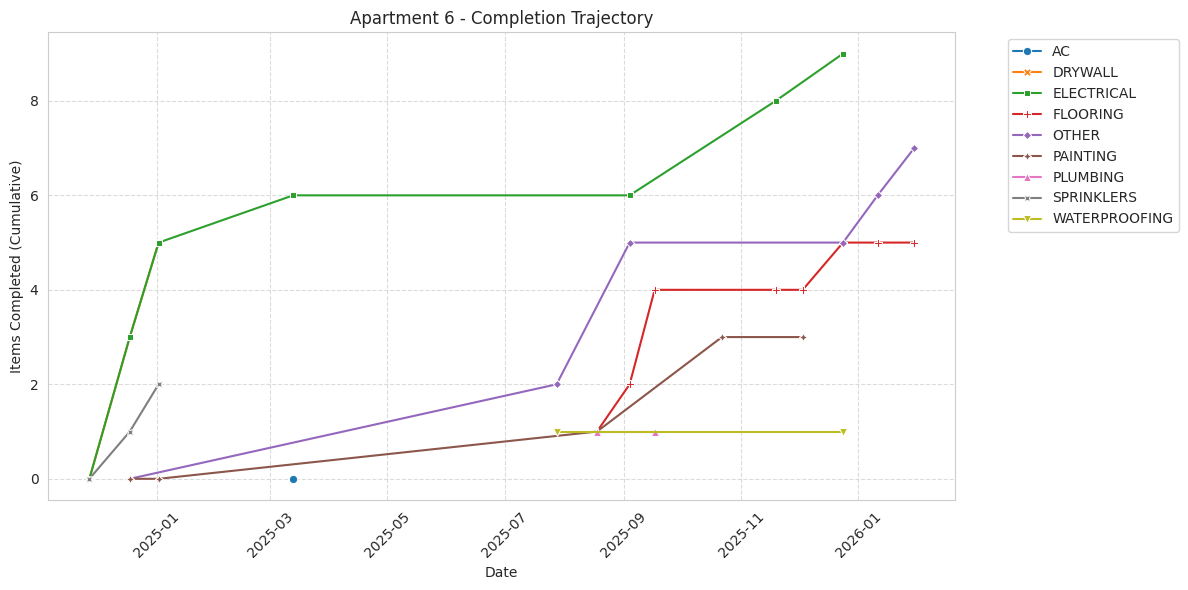

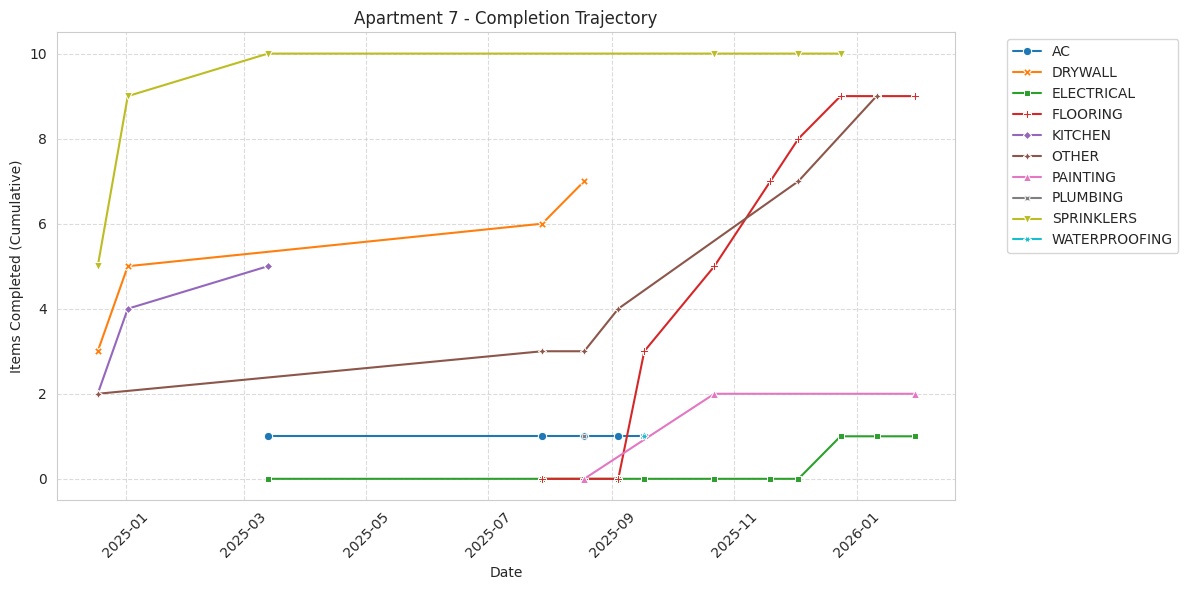

In [14]:
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Using the 'df_grouped' from previous step
if 'df_grouped' in locals() and not df_grouped.empty:
    apartments = sorted(df_grouped['apartment_number'].unique())
    
    # Define category order for consistency (optional)
    categories = sorted(df_grouped['category'].unique())
    
    # Create a separate plot for each apartment
    for apt_num in apartments:
        apt_data = df_grouped[df_grouped['apartment_number'] == apt_num]
        
        plt.figure(figsize=(12, 6))
        ax = plt.gca()
        
        # Plot each category line
        sns.lineplot(
            data=apt_data, 
            x='reportDate', 
            y='cumulative_completed', 
            hue='category',
            style='category',
            markers=True, 
            dashes=False,
            ax=ax
        )
        
        ax.set_title(f'Apartment {apt_num} - Completion Trajectory')
        ax.set_xlabel('Date')
        ax.set_ylabel('Items Completed (Cumulative)')
        plt.xticks(rotation=45)
        ax.grid(True, linestyle='--', alpha=0.7)
        
        # Move legend to outside if crowded
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        
        plt.tight_layout()
        plt.show()
        
else:
    print("No data available for visualization")


In [15]:
# Filter and display Electrical items for Apartment 7
if 'df_apartments' in locals() and 'df_work_items' in locals():
    # Get Apartment 7 ID (ensure string '7' match)
    apt_row = df_apartments[df_apartments['number'].astype(str) == '7']
    
    if not apt_row.empty:
        apt_7_id = apt_row['id'].iloc[0]
        
        # Filter work items for this apartment and Electrical category
        # Broad matching for 'Electrical' (English) or 'חשמל' (Hebrew)
        mask_apt = df_work_items['apartmentId'] == apt_7_id
        mask_elec = df_work_items['category'].astype(str).str.contains('ELECTRICAL|חשמל', case=False, na=False)
        
        df_apt7_elec = df_work_items[mask_apt & mask_elec]
        
        print(f"Found {len(df_apt7_elec)} Electrical work items for Apartment 7:")
        display_scrollable_dataframe(df_apt7_elec)
    else:
        print("Apartment 7 not found in the 'Apartment' table.")
else:
    print("Dataframes 'df_apartments' or 'df_work_items' not loaded.")


Found 21 Electrical work items for Apartment 7:


,id,reportId,apartmentId,category,location,description,status,notes,hasPhoto,photoNotes,createdAt,updatedAt
191,cmkpaac7j008l13u5hq83sazm,cmkpaac3e007n13u5gy4hrehp,cmkpa099g000a10kkf2am83ne,ELECTRICAL,כלל הבית,"חסרים שקעים במבואת כניסה, חדר שינה 1, ממ""ד וסלון",DEFECT,חסרות נקודות תקשורת ושקעים במספר מקומות,1,None,1769076189775,1769098908102
214,cmkpadmsp009r5sxqi5amp7tc,cmkpadmjw00835sxq1hq7eb7o,cmkpa099g000a10kkf2am83ne,ELECTRICAL,כלל הבית,"בדיקת תוכנית חשמל על פי תוכנית שינויי דיירים לביצוע חתומה ע""י הדייר",DEFECT,"חדר שינה 1 - חסרה נקודת תקשורת LAN, ממ""ד - חסרה נקודת תקשורת LAN, סלון - חסרה נקודת תקשורת LAN, מטבח - דרוש בנקודת החשמל הרצפתית חור בבריצוף",1,None,1769076343465,1769098908117
257,cmkpagf6p00fj5sxq3i3p9i9f,cmkpagew100df5sxqvkn73nq6,cmkpa099g000a10kkf2am83ne,ELECTRICAL,כלל הבית,"בדיקת תוכנית חשמל על פי תוכנית שינויי דיירים לביצוע חתומה ע""י הדייר",DEFECT,"ממ""ד - חסרה נקודת תקשורת LAN, סלון - חסרה נקודת תקשורת LAN, חדר שינה 1 - חסרה נקודת תקשורת LAN, מטבח - דרוש בנקודת החשמל הרצפתית חור בבריצוף סוג ב' בגודל 130x130 מ""מ ועומק 78.5 ממ",1,None,1769076473570,1769076473570
261,cmkpagf7o00fr5sxqtutixtgj,cmkpagew100df5sxqvkn73nq6,cmkpa099g000a10kkf2am83ne,ELECTRICAL,כלל הבית,העברת כבל חשמל בצורה לקויה יש לשבור את הריצוף ולבטן כמו כנדרש,DEFECT,NaN,0,None,1769076473604,1769076473604
284,cmkpajlj100cn13u5q28r96xs,cmkpajlcg00bf13u5jx00llau,cmkpa099g000a10kkf2am83ne,ELECTRICAL,כלל הבית,חסרות נקודות תקשורת LAN במספר מקומות,DEFECT,"ממ""ד, חדר שינה 1, סלון - חסרות נקודות",1,None,1769076621757,1769076621757
287,cmkpajljs00ct13u5uugwyf4q,cmkpajlcg00bf13u5jx00llau,cmkpa099g000a10kkf2am83ne,ELECTRICAL,כלל הבית,העברת כבל חשמל בצורה לקויה,DEFECT,יש לשבור את הריצוף ולבטן כנדרש,1,None,1769076621784,1769076621784
314,cmkpalfue00kr5sxqrqze6k7l,cmkpajlcg00bf13u5jx00llau,cmkpa099g000a10kkf2am83ne,ELECTRICAL,כלל הבית,בדיקת תוכנית חשמל על פי תוכנית שינויי דיירים - חסרות נקודות תקשורת LAN,DEFECT,"בטיפול - חדר שינה 1, ממ""ד, סלון חסרות נקודות תקשורת LAN. מטבח - דרוש חור בנקודת החשמל הרצפתית",1,None,1769076707702,1769098908195
336,cmkpamu6200gt13u5u5kv3hpn,cmkpamu3300fn13u584c2vdhu,cmkpa099g000a10kkf2am83ne,ELECTRICAL,כלל הבית,"בדיקת תוכנית חשמל על פי תוכנית שינויי דיירים לביצוע חתומה ע""י הדייר",DEFECT,"בטיפול - חדר שינה 1 - חסרה נקודת תקשורת LAN, ממ""ד - חסרה נקודת תקשורת LAN, סלון - חסרה נקודת תקשורת LAN",1,None,1769076772923,1769098908226
340,cmkpamu6o00h113u5xmoel85n,cmkpamu3300fn13u584c2vdhu,cmkpa099g000a10kkf2am83ne,ELECTRICAL,כלל הבית,העברת כבל חשמל בצורה לקויה יש לשבור את הריצוף ולבטן כמו כנדרש,DEFECT,NaN,0,None,1769076772944,1769076772944
365,cmkpanvvg00pl5sxqeifx61ul,cmkpamu3300fn13u584c2vdhu,cmkpa099g000a10kkf2am83ne,ELECTRICAL,כלל הבית,בדיקת תוכנית חשמל,DEFECT,"בטיפול - חדר שינה 1 - חסרה נקודת תקשורת LAN, ממ""ד - חסרה נקודת תקשורת LAN, סלון - חסרה נקודת תקשורת LAN, מטבח - דרוש בנקודת החשמל הרצפתית חור בריצוף",1,None,1769076821788,1769098908242


In [16]:
# Apartment 7 Electrical - Detailed Data Table
if 'df_work_items' in locals() and 'df_reports' in locals() and 'df_apartments' in locals():
    # 1. Get Apt 7 ID
    apt_7_row = df_apartments[df_apartments['number'].astype(str) == '7']
    if not apt_7_row.empty:
        apt_7_id = apt_7_row['id'].iloc[0]

        # 2. Filter Work Items for Apt 7 and Electrical
        mask_apt = df_work_items['apartmentId'] == apt_7_id
        mask_elec = df_work_items['category'].astype(str).str.contains('ELECTRICAL|חשמל', case=False, na=False)
        df_apt7_elec_items = df_work_items[mask_apt & mask_elec].copy()

        # 3. Join with Reports to get Date
        # df_reports has 'id' and 'reportDate'
        df_apt7_elec_detailed = pd.merge(
            df_apt7_elec_items,
            df_reports[['id', 'reportDate']],
            left_on='reportId',
            right_on='id',
            how='left'
        )
        
        # Convert date
        df_apt7_elec_detailed['reportDate'] = pd.to_datetime(df_apt7_elec_detailed['reportDate'], unit='ms')
        
        print(f"Apartment 7 Electrical Items ({len(df_apt7_elec_detailed)} items):")
        # Select relevant columns for display
        display_cols = ['reportDate', 'category', 'location', 'description', 'status']
        
        # Sort by date
        df_apt7_elec_detailed = df_apt7_elec_detailed.sort_values('reportDate')
        
        display_scrollable_dataframe(df_apt7_elec_detailed[display_cols])
    else:
        print("Apartment 7 not found.")
else:
    print("Required dataframes not loaded.")


Apartment 7 Electrical Items (21 items):


,reportDate,category,location,description,status
0,2025-03-13,ELECTRICAL,כלל הבית,"חסרים שקעים במבואת כניסה, חדר שינה 1, ממ""ד וסלון",DEFECT
1,2025-07-28,ELECTRICAL,כלל הבית,"בדיקת תוכנית חשמל על פי תוכנית שינויי דיירים לביצוע חתומה ע""י הדייר",DEFECT
18,2025-08-18,ELECTRICAL,כלל הבית,"בדיקת תוכנית חשמל על פי תוכנית שינויי דיירים לביצוע חתומה ע""י הדייר",DEFECT
2,2025-09-04,ELECTRICAL,כלל הבית,"בדיקת תוכנית חשמל על פי תוכנית שינויי דיירים לביצוע חתומה ע""י הדייר",DEFECT
3,2025-09-04,ELECTRICAL,כלל הבית,העברת כבל חשמל בצורה לקויה יש לשבור את הריצוף ולבטן כמו כנדרש,DEFECT
4,2025-09-17,ELECTRICAL,כלל הבית,חסרות נקודות תקשורת LAN במספר מקומות,DEFECT
5,2025-09-17,ELECTRICAL,כלל הבית,העברת כבל חשמל בצורה לקויה,DEFECT
6,2025-09-17,ELECTRICAL,כלל הבית,בדיקת תוכנית חשמל על פי תוכנית שינויי דיירים - חסרות נקודות תקשורת LAN,DEFECT
9,2025-10-22,ELECTRICAL,כלל הבית,בדיקת תוכנית חשמל,DEFECT
10,2025-10-22,ELECTRICAL,כלל הבית,עבודות חשמל,DEFECT


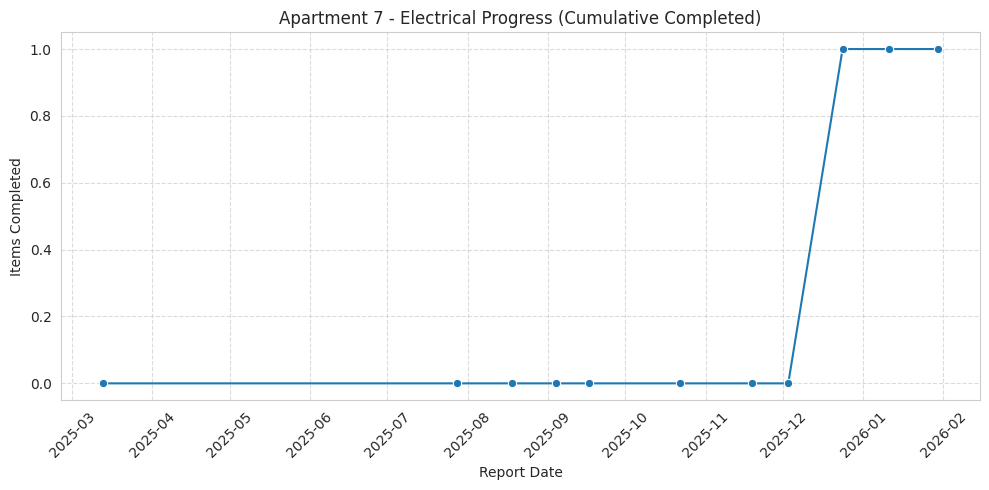

In [17]:
# Apartment 7 Electrical - Progress Graph
import matplotlib.pyplot as plt
import seaborn as sns

if 'df_apt7_elec_detailed' in locals() and not df_apt7_elec_detailed.empty:
    # Define Positive Statuses
    COMPLETED_STATUSES = ['DONE', 'COMPLETED', 'בוצע', 'תקין', 'OK', 'טופל']
    
    def is_done(status):
        if not isinstance(status, str): return 0
        # Check if any completion keyword is in the status text
        s_upper = status.upper()
        return 1 if any(x in s_upper for x in COMPLETED_STATUSES) else 0

    df_viz = df_apt7_elec_detailed.copy()
    df_viz['is_completed'] = df_viz['status'].apply(is_done)
    
    # Aggregate by Date: Count 'Completed' items per report date
    # We assume 'count of completed' in a report is the metric for that date
    progress_data = df_viz.groupby('reportDate')['is_completed'].sum().reset_index()
    
    # If we want a cumulative progress over time:
    # Logic: if reports represent *incremental* work, cumsum is correct.
    # If reports represent *state*, we might just plot the raw count.
    # Given user request 'progress graph', likely wants to see it go UP.
    progress_data['cumulative_completed'] = progress_data['is_completed'].cumsum()
    
    plt.figure(figsize=(10, 5))
    sns.lineplot(data=progress_data, x='reportDate', y='cumulative_completed', marker='o')
    
    plt.title('Apartment 7 - Electrical Progress (Cumulative Completed)')
    plt.xlabel('Report Date')
    plt.ylabel('Items Completed')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("No data available for graph.")


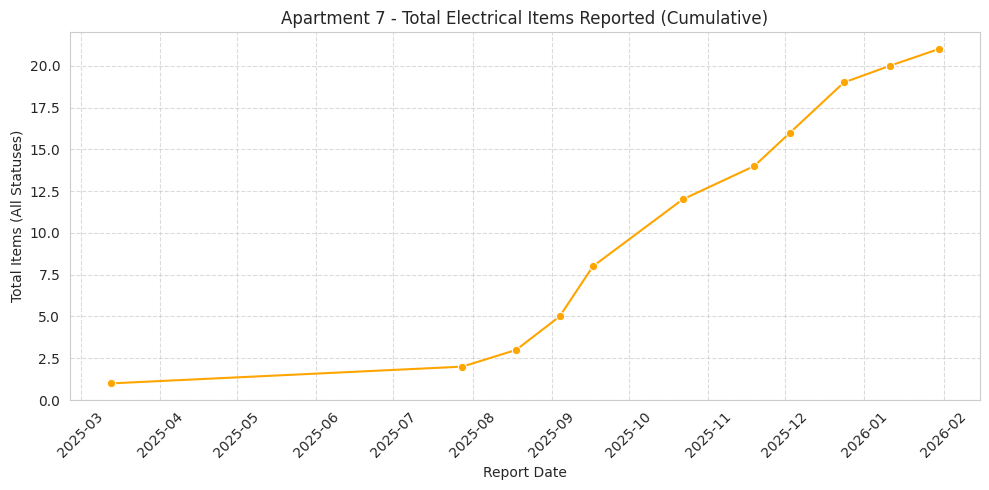

In [18]:
# Apartment 7 Electrical - Total Items Cumulative Graph
if 'df_apt7_elec_detailed' in locals() and not df_apt7_elec_detailed.empty:
    # We want to count ALL items reported over time, regardless of status
    df_viz_total = df_apt7_elec_detailed.copy()
    
    # Aggregate by Date: Count 'All' items per report date
    # Every row is an item, so we just count them
    items_per_date = df_viz_total.groupby('reportDate').size().reset_index(name='item_count')
    
    # Calculate cumulative sum of all items
    items_per_date['cumulative_total'] = items_per_date['item_count'].cumsum()
    
    plt.figure(figsize=(10, 5))
    sns.lineplot(data=items_per_date, x='reportDate', y='cumulative_total', marker='o', color='orange')
    
    plt.title('Apartment 7 - Total Electrical Items Reported (Cumulative)')
    plt.xlabel('Report Date')
    plt.ylabel('Total Items (All Statuses)')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("No data available for Total Items graph.")


In [1]:
import sys
# Ensure the directory is in path
sys.path.append(r'c:\Users\yoel\constructor\Explore_Data')

from progress_visualization import display_readiness_heatmap

# Display the heatmap
display_readiness_heatmap()


State,OK,DEFECT,PENDING,Total,Health_Score
apartmentNumber,,,,,
1,6,5,3,14,42.9%
10,9,3,4,16,56.2%
11,6,6,3,15,40.0%
14,8,3,2,13,61.5%
3,14,10,5,29,48.3%
5,16,8,2,26,61.5%
6,13,6,6,25,52.0%
7,21,9,1,31,67.7%
